**Imports**

In [222]:
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.stats import norm
import seaborn as sns
from tqdm import tqdm
import pandas as pd
from scipy.optimize import minimize
from matplotlib.ticker import AutoMinorLocator

colors = ['crimson','midnightblue', 'violet','orange','springgreen','dodgerblue','darkviolet', 'olive','tomato']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

**Mini Exercise**

**Exercise 1**

**Exercise 2**

**Exercise 3**

**Mini Exercise - Monte Carlo**

In [224]:
def func_gaussian(x, mu, sigma):
    return norm.pdf(x, mu, sigma)

In [225]:
mean = 0.2
sigma = 0.1
number_of_samples = 50

random_samples = np.random.normal(mean, sigma, number_of_samples)
#log_likelihood = np.sum(norm.logpdf(random_samples, mean, sigma))
log_likelihood = np.sum(np.log(random_samples))
estimated_mean = np.mean(random_samples)
estimated_sigma = np.std(random_samples, ddof=1) # ddof=1 for sample standard deviation
log_likelihood, estimated_mean, estimated_sigma

(-85.53635060491686, 0.20594492050805105, 0.09081051155649904)

In [226]:
mean = 0.2
sigma = 0.1
number_of_samples = 50

random_samples = np.random.normal(mean, sigma, number_of_samples)

In [227]:
LLHS = []

for i in np.linspace(mean-0.15,mean+0.15,10):
    for j in np.linspace(sigma,sigma+0.25,10):
        log_likelihood= np.sum(norm.logpdf(random_samples, i, j))
        LLHS.append([np.round(i,2),np.round(j,2),log_likelihood])

df = pd.DataFrame(LLHS, columns=['$\mu$', '$\sigma$', 'Intensity'])

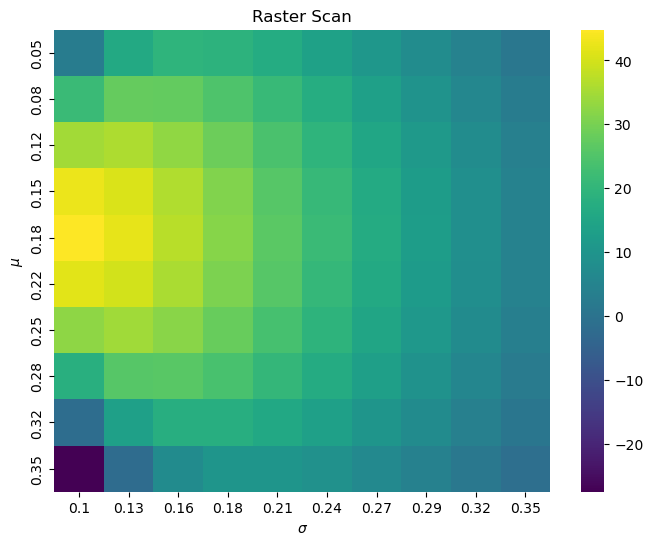

In [228]:
# Pivot the DataFrame to make it suitable for heatmap plotting
pivot_table = df.pivot(index='$\mu$', columns='$\sigma$', values='Intensity')
# Plot the heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(pivot_table, annot=False, fmt=".2f", cmap="viridis")
plt.title('Raster Scan')
plt.show()

**Multi-parameter likelihood**

In [229]:
alpha = 0.5
beta = 0.5
number_of_samples = 2000

def multi_param_function(x,a,b):
    return 1 + a*x + b*x**2

def normalize(lst):
    max_val = max(lst)
    return [x / max_val for x in lst] if max_val else lst

x = np.random.uniform(-1,1,number_of_samples)
random_samples = multi_param_function(x,alpha,beta)
random_samples = normalize(random_samples)

In [ ]:
log_likelihood= np.sum(norm.logpdf(random_samples, i, j))

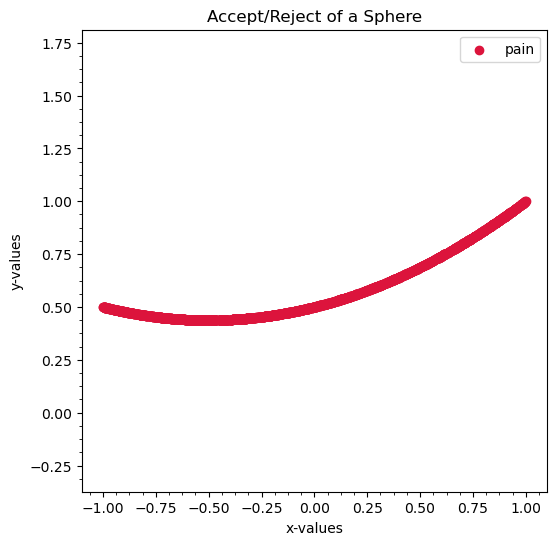

In [236]:
plt.figure(figsize=(6, 6))
plt.scatter(x,random_samples, alpha=1.,label='Painful pain')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.xlim(-1,1)
plt.ylim(0.25,1)
ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.tick_params(which='minor', length=2, color='k')
plt.title('Accept/Reject of a Sphere')
plt.axis('equal')  # Ensures the aspect ratio is equal to show the circle properly
plt.legend()
plt.show()